Matplotlib è una libreria per la creazione di visualizzazioni statiche, interattive e animate in Python.
Alcuni dei principali tipi di grafici disponibili in Matplotlib sono: grafici a linee, a barre, a dispersione (scatter), istogrammi e grafici a torta, insieme a molti altri.
È altamente personalizzabile e può essere utilizzata per creare grafici complessi sovrapponendo diversi elementi.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # si importa con il l'alias plt

"Plottare" una linea


In [ ]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)

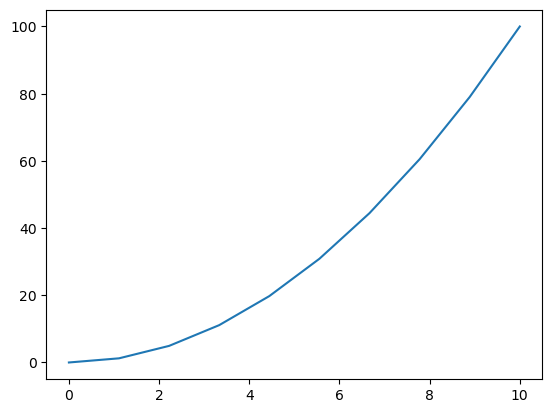

In [5]:
# Grafico a Linee
x = np.linspace(0, 10, 10)
y = [value**2 for value in x]

plt.plot(x, y)

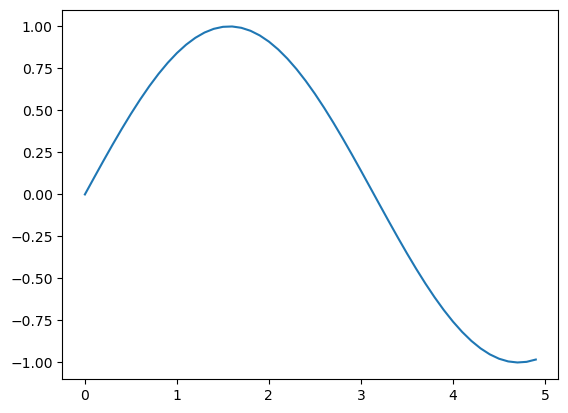

In [6]:
x = np.arange(0,5,0.1)
y = np.sin(x)
plt.plot(x,y)

GRAFICI A BARRE


VERTICALI

<BarContainer object of 4 artists>

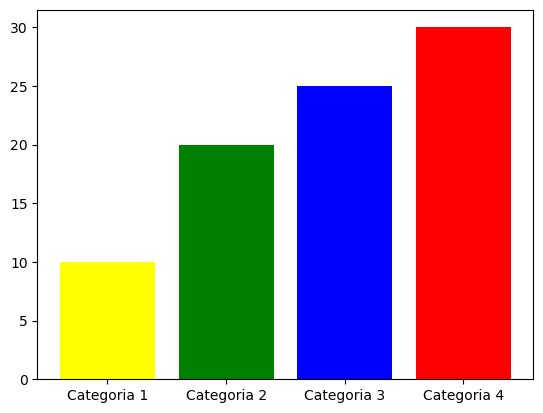

In [7]:
categorie = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 4']
valori = [10, 20, 25, 30]
plt.bar(categorie, valori, color= ['yellow', 'green', 'blue', 'red'])

ORIZZONTALI

<BarContainer object of 4 artists>

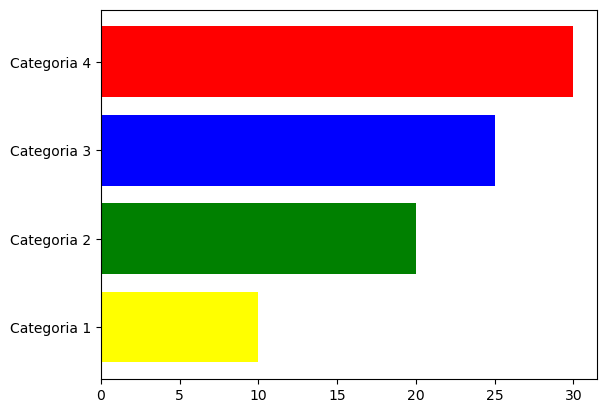

In [8]:
plt.barh(categorie, valori, color= ['yellow', 'green', 'blue', 'red'])

ETICHETTE SUI GRAFICI

Qui sotto trovi alcune funzioni di base per aggiungere etichette a un grafico:

title() - Imposta un titolo per il grafico
xlabel() - Imposta l’etichetta dell’asse x
ylabel() - Imposta l’etichetta dell’asse y
xticks() - Personalizza l’asse x
rotation - ruota l’etichetta di un certo numero di gradi, ad esempio plt.xticks(rotation=45) per ruotare le etichette dell’asse x di 45 gradi
yticks() - Personalizza l’asse y

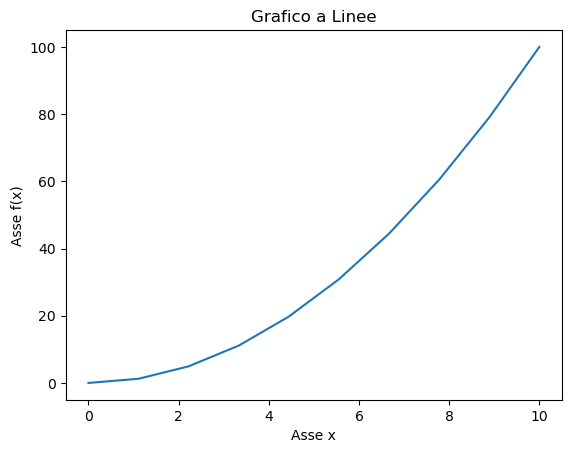

In [9]:
# Grafico a Linee
x = np.linspace(0, 10, 10)
y = [value**2 for value in x]

plt.plot(x, y)
plt.title('Grafico a Linee')
plt.xlabel('Asse x')
plt.ylabel('Asse f(x)')
plt.show()

PANDAS + MATPLOIT

In [25]:
%conda install pandas
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  # we will use this for plotting

# Carica il dataset
dataset = load_dataset("yiqing111/Engineering_Jobs_Insight_Dataset")

# Converte in DataFrame Pandas
df = dataset['train'].to_pandas()
# Rimpiazza gli spazi con l'underscore
df.columns = df.columns.str.replace(' ', '_')
# Trasformo le date in formaro date time
df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], errors='coerce')

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Repo card metadata block was not found. Setting CardData to empty.


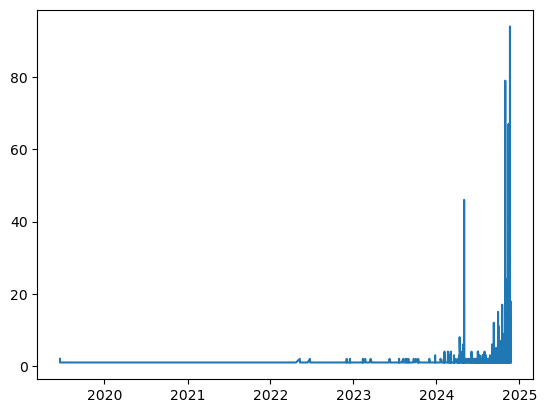

In [26]:

date_counts = df['Date_Posted'].value_counts()
date_counts = date_counts.sort_index()
date_counts
plt.plot(date_counts.index, date_counts.values)

Dobbiamo estrarre il mese utilizzando l’accessor dt e l’attributo .month dalla colonna Date_Posted

In [27]:
df['job_posted_month'] = df['Date_Posted'].dt.month

# Group by 'month' and count the job postings
monthly_counts = df['job_posted_month'].value_counts()

# Sort the months
monthly_counts = monthly_counts.sort_index()

monthly_counts

job_posted_month
1       32
2      202
3      117
4      163
5      582
6      119
7      314
8     1116
9     1165
10    2493
11    4837
12      45
Name: count, dtype: int64

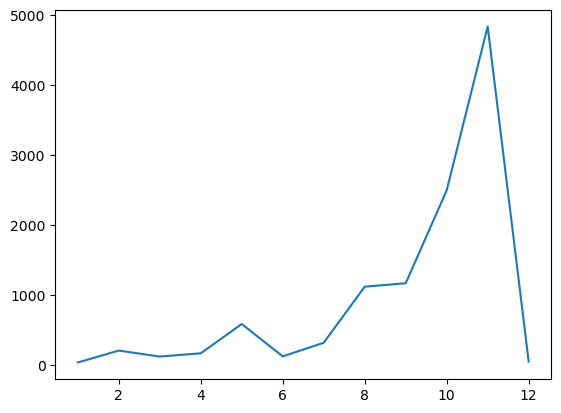

In [28]:
plt.plot(monthly_counts.index, monthly_counts)

In [30]:
job_counts = df['Job_Title'].value_counts()
job_counts

Job_Title
Software Engineer                                                     311
Product Manager  Social app startup                                   282
Associate Product Manager  Social app startup                         277
2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)    267
Real-Time Software Engineer                                           266
                                                                     ... 
Business Analyst Intern SC                                              1
Technical Business Analyst TX                                           1
HRIS Business Analyst FL                                                1
Business Analyst II TX                                                  1
Backend Developer - Java JVM Blockchain                                 1
Name: count, Length: 4848, dtype: int64

Text(0.5, 1.0, 'Job Postings by Job Title')

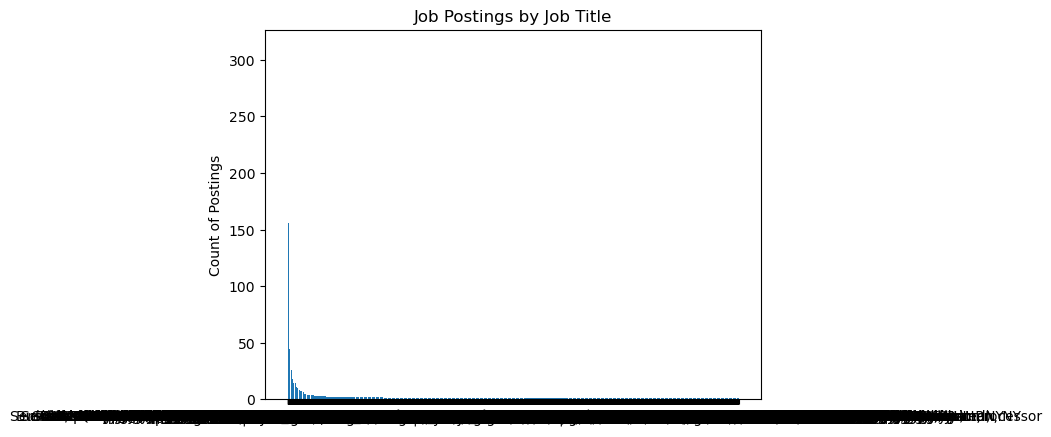

In [31]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings') # no xlabel required as I feel it's self explanatory
plt.title('Job Postings by Job Title')

In [ ]:
# Get the value counts of the job titles for the filtered DataFrame visuallizzo solo i 6 valori
job_counts = df['Job_Title'].value_counts()
job_counts = job_counts.head(6)
job_counts = job_counts.sort_values(ascending=True)

job_counts

Job_Title
Data Science Internship (Remote Eligible) - Graduate Student Preferred    255
Real-Time Software Engineer                                               266
2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)        267
Associate Product Manager  Social app startup                             277
Product Manager  Social app startup                                       282
Software Engineer                                                         311
Name: count, dtype: int64

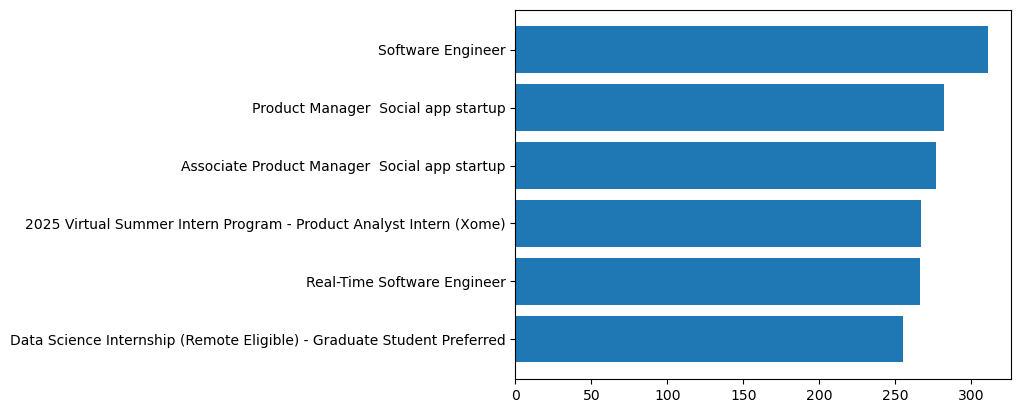

In [33]:
plt.barh(job_counts.index, job_counts)  # Changed this to be a horizontal bar chart instead
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Data Science Internship (Remote Eligible) - Graduate Student Preferred'),
  Text(1, 0, 'Real-Time Software Engineer'),
  Text(2, 0, '2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)'),
  Text(3, 0, 'Associate Product Manager  Social app startup'),
  Text(4, 0, 'Product Manager  Social app startup'),
  Text(5, 0, 'Software Engineer')])

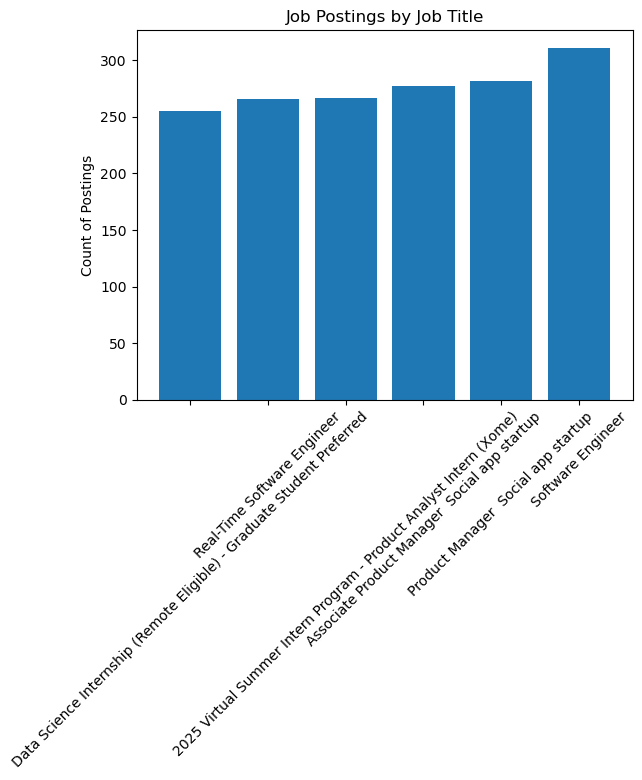

In [34]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings') # no xlabel required as I feel it's self explanatory
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45) 


Le etichette dell’asse x sono tutte disallineate, sistemiamole utilizzando gli argomenti ha e va nel metodo .xticks().

ha='right': allinea il bordo destro dell’etichetta con il segno di graduazione, compensando la rotazione e aiutando a centrare meglio l’etichetta.
va='top': regola l’allineamento verticale per mantenere il testo sopra il segno di graduazione, evitando che si sovrapponga all’asse x.

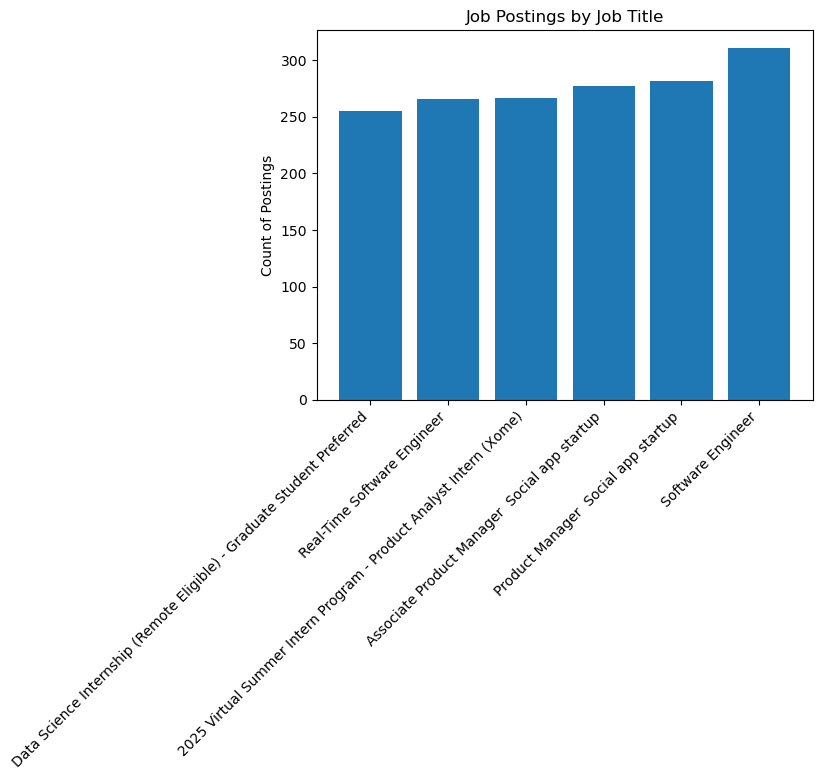

In [35]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right') 
plt.show()

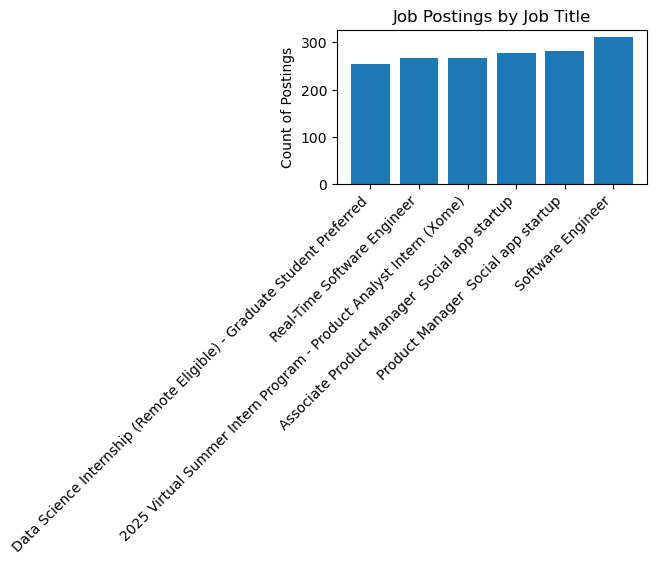

In [36]:
plt.figure(figsize=(4, 2))  # riduce la dimensione rispetto al default
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right') 
plt.show()